<ipython-input-7-7a2274492fe9>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts_data = pd.read_csv('/sensor_data.csv', parse_dates=[0], index_col=0)


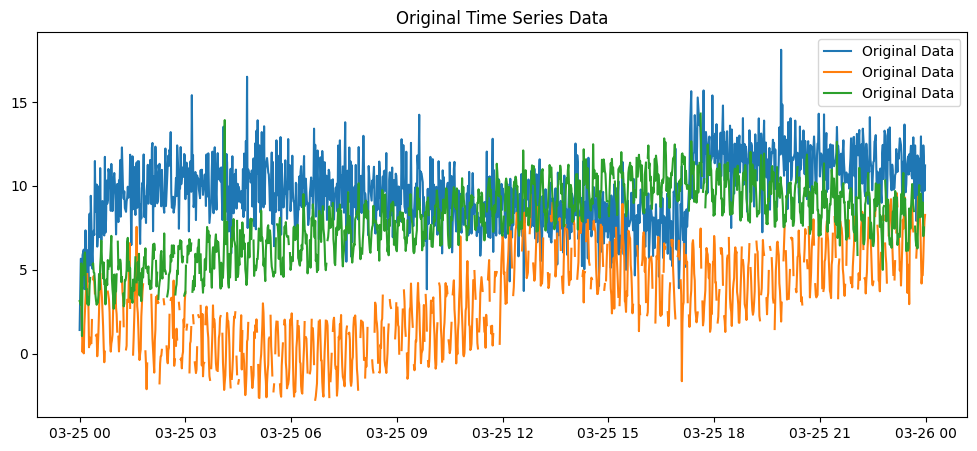

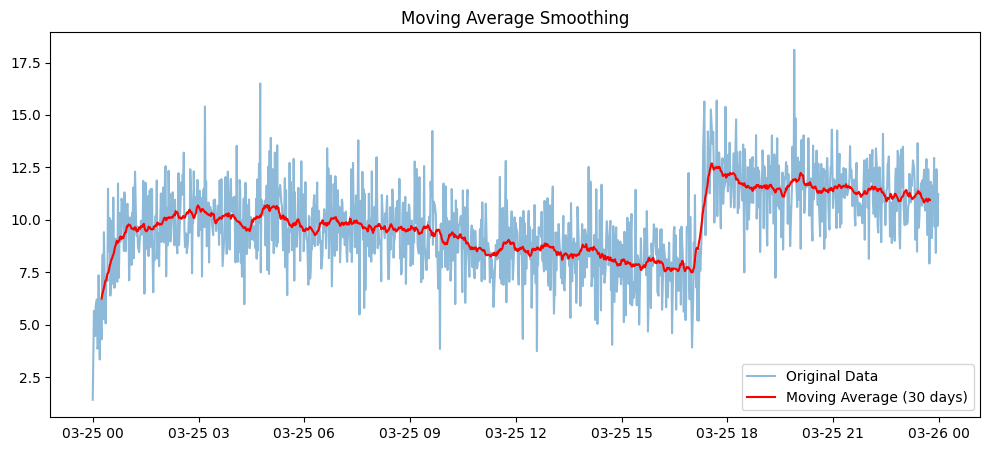

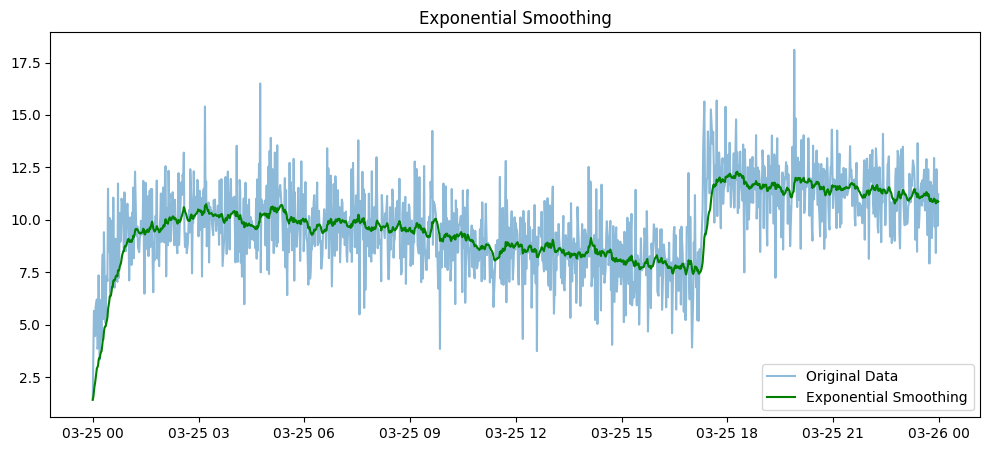

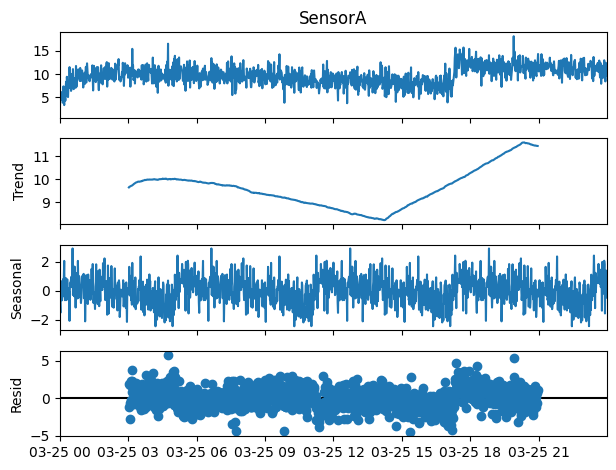

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load dataset
ts_data = pd.read_csv('/sensor_data.csv', parse_dates=[0], index_col=0)
ts_data = ts_data.sort_index()

# Handle missing values by interpolation before decomposition
# Linear interpolation is used here, consider other methods if appropriate
ts_data.iloc[:, 0] = ts_data.iloc[:, 0].interpolate(method='linear')

# Plot original data
plt.figure(figsize=(12, 5))
plt.plot(ts_data, label='Original Data')
plt.title('Original Time Series Data')
plt.legend()
plt.show()

# Moving Average Smoothing
ts_data['Moving_Avg'] = ts_data.iloc[:, 0].rolling(window=30, center=True).mean()
plt.figure(figsize=(12, 5))
plt.plot(ts_data.iloc[:, 0], label='Original Data', alpha=0.5)
plt.plot(ts_data['Moving_Avg'], label='Moving Average (30 days)', color='red')
plt.title('Moving Average Smoothing')
plt.legend()
plt.show()

# Exponential Smoothing
ts_data['Exp_Smooth'] = ts_data.iloc[:, 0].ewm(span=30, adjust=False).mean()
plt.figure(figsize=(12, 5))
plt.plot(ts_data.iloc[:, 0], label='Original Data', alpha=0.5)
plt.plot(ts_data['Exp_Smooth'], label='Exponential Smoothing', color='green')
plt.title('Exponential Smoothing')
plt.legend()
plt.show()

# Seasonal Decomposition
result = seasonal_decompose(ts_data.iloc[:, 0], model='additive', period=365)
result.plot()
plt.show()